<a href="https://colab.research.google.com/github/will-cotton4/A-LSDS-prediction-kaggle/blob/master/Kaggle_Project_Week_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

train_feat_url = 'https://raw.githubusercontent.com/will-cotton4/A-LSDS-prediction-kaggle/master/train_features.csv'
train_label_url = 'https://raw.githubusercontent.com/will-cotton4/A-LSDS-prediction-kaggle/master/train_labels.csv'
test_feat_url = 'https://raw.githubusercontent.com/will-cotton4/A-LSDS-prediction-kaggle/master/test_features.csv'
train_features = pd.read_csv(train_feat_url)
train_labels = pd.read_csv(train_label_url)
test_features = pd.read_csv(test_feat_url)

In [0]:
train_features.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,59360,59361,59362,59363,59364,59365,59366,59367,59368,59369,59370,59371,59372,59373,59374,59375,59376,59377,59378,59379,59380,59381,59382,59383,59384,59385,59386,59387,59388,59389,59390,59391,59392,59393,59394,59395,59396,59397,59398,59399
id,69572,8776,34310,67743,19728,9944,19816,54551,53934,46144,49056,50409,36957,50495,53752,61848,48451,58155,34169,18274,48375,6091,58500,37862,51058,22308,55012,20145,19685,69124,46804,6696,57238,12402,41583,57355,67359,60048,16583,25,...,12874,35991,18917,17646,11047,8810,55232,73019,61732,47527,14796,20387,29940,15233,49651,50998,34716,43986,38067,58255,30647,67885,47002,44616,72148,34473,34952,26640,72559,30410,13677,44885,40607,48348,11164,60739,27263,37057,31282,26348
amount_tsh,6000,0,25,0,0,20,0,0,0,0,0,200,0,0,0,0,500,0,0,500,200,0,0,500,0,0,500,0,0,0,0,50,0,0,0,0,0,0,4000,0,...,0,0,0,0,0,0,0,2000,0,0,200,0,0,5000,0,40000,0,0,500,0,6000,0,6,0,0,500,0,100,0,0,0,0,0,0,500,10,4700,0,0,0
date_recorded,2011-03-14,2013-03-06,2013-02-25,2013-01-28,2011-07-13,2011-03-13,2012-10-01,2012-10-09,2012-11-03,2011-08-03,2011-02-20,2013-02-18,2012-10-14,2013-03-15,2012-10-20,2011-08-04,2011-07-04,2011-09-04,2011-07-22,2011-02-22,2011-02-27,2013-02-10,2011-10-04,2013-11-03,2013-01-21,2013-02-25,2013-01-16,2011-07-11,2013-03-05,2013-03-16,2011-03-23,2011-03-16,2013-03-19,2011-03-11,2011-02-23,2013-03-28,2011-07-16,2011-03-27,2011-02-20,2013-02-11,...,2011-03-26,2012-10-30,2011-03-02,2013-01-20,2011-07-28,2011-09-04,2013-02-02,2011-03-09,2011-03-08,2011-04-12,2013-01-29,2012-10-09,2012-10-31,2013-01-30,2012-10-29,2011-08-03,2013-02-03,2012-10-23,2011-03-21,2011-07-13,2011-03-14,2011-03-16,2013-08-03,2013-01-19,2011-07-10,2012-11-03,2011-08-22,2013-03-12,2013-01-29,2011-08-06,2011-08-04,2013-08-03,2011-04-15,2012-10-27,2011-03-09,2013-05-03,2011-05-07,2011-04-11,2011-03-08,2011-03-23
funder,Roman,Grumeti,Lottery Club,Unicef,Action In A,Mkinga Distric Coun,Dwsp,Rwssp,Wateraid,Isingiro Ho,Private,Danida,World Vision,Lawatefuka Water Supply,Biore,Rudep,Unicef,Unicef,Hesawa,Danida,Twe,Dwsp,Unicef,Isf,African Development Bank,Government Of Tanzania,Sobodo,Hesawa,Government Of Tanzania,Lawatefuka Water Supply,Water,Private Individual,Government Of Tanzania,Undp,NaN,Not Known,Danida,Kirde,Cefa,Government Of Tanzania,...,Government Of Tanzania,Tlc,Samlo,Singida Yetu,He,Unicef,NaN,Government Of Tanzania,Dct,Rc Church,NaN,Netherlands,Tlc,Rudep,Rwssp,Government Of Tanzania,NaN,Government Of Tanzania,Rc,Do,Roman,Mkinga Distric Coun,Ces(gmbh),World Bank,Concern,Jaica,Adb,0,Kidep,Co,Rudep,Government Of Tanzania,Government Of Tanzania,Private,World Bank,Germany Republi,Cefa-njombe,NaN,Malec,World Bank
gps_height,1390,1399,686,263,0,0,0,0,0,0,62,1062,0,1368,0,1645,1703,1656,1162,1763,2216,0,1510,672,1645,1273,200,0,1443,1256,0,180,1481,1638,-41,1546,0,0,1955,1348,...,0,0,2190,1495,0,1656,1541,1977,0,0,1154,0,0,1137,0,54,1581,0,2101,0,1439,0,1383,11,0,1327,1786,25,1414,783,1715,540,0,0,351,1210,1212,0,0,191
installer,Roman,GRUMETI,World vision,UNICEF,Artisan,DWE,DWSP,DWE,Water Aid,Artisan,Private,DANIDA,World vision,Lawatefuka water sup,WEDECO,DWE,DWE,DWE,DWE,Danid,TWE,DWE,DWE,ISF,DWE,DWE,Kilolo Star,DWE,District council,Lawatefuka water sup,Water,WU,DWE,DWE,NaN,Not known,Central government,DWE,CEFA,DWE,...,DWE,TLC,SHIPO,SINGIDA YETU,HE,DWE,NaN,Commu,Gove,RC Church,NaN,DWE,TLC,Distri,DWE,DWE,NaN,Government,ACRA,DO,Roman,DWE,DWE,World bank,CONCERN,JAICA CO,DWE,0,DWE,DWE,DWE,Government,Government,Private,ML appro,CES,Cefa,NaN,Musa,World
longitude,34.9381,34.6988,37.4607,38.4862,31.1308,39.1728,33.3624,32.6206,32.7111,30.627,39.2095,35.7703,33.7981,37.0926,34.3641,31.4441,34.6424,34.5693,32.9202,34.509,34.4734,0,34.5869,37.94,29.7471,37.4228,39.3708,31.1043,37.6111,37.0617,36.1083,38.3636,37.4923,34.4784,39.8129,36.6187,33.8543,35.8584,35.8903,30.6133,...,33.2422,32.0876,34.7168,34.7662,31.5617,34.5948,34.765

In [0]:
train_features.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [0]:
train_features.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [0]:
train_features['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [0]:
train_features['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [0]:
!pip install category-encoders
import category_encoders as ce

     |████████████████████████████████| 92kB 2.4MB/s 


In [95]:
train_feat_url = 'https://raw.githubusercontent.com/will-cotton4/A-LSDS-prediction-kaggle/master/train_features.csv'
train_label_url = 'https://raw.githubusercontent.com/will-cotton4/A-LSDS-prediction-kaggle/master/train_labels.csv'
test_feat_url = 'https://raw.githubusercontent.com/will-cotton4/A-LSDS-prediction-kaggle/master/test_features.csv'

X = pd.read_csv(train_feat_url)
y = pd.read_csv(train_label_url)
X_test = pd.read_csv(test_feat_url)

def wrangle_labels(y):
  y = y.copy()
  y = y.set_index('id')
  label_dict = {'functional':2, 'functional needs repair': 1, 'non functional': 0}
  y = y.replace(label_dict)
  return y

y = wrangle_labels(y)

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, 
                                                  random_state=42, stratify=y)

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer 

def wrangle(X):
  X = X.copy()
  X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
  X['date_recorded_month'] = X['date_recorded'].dt.month.astype('object')
  X['date_recorded_year'] = X['date_recorded'].dt.year.astype('object')
  X['date_recorded_day'] = X['date_recorded'].dt.day.astype('object')
  X = X.drop(columns='date_recorded')
  
  imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  X =  pd.DataFrame(imp_mode.fit_transform(X), columns=X.columns)
  drop_cols = ['longitude', 'latitude']

  #   X = X.drop(columns=drop_cols)
#   cat_cols = X.select_dtypes(['object']).columns.tolist()

#   binary_ce = ce.BinaryEncoder(cols=cat_cols, verbose=10, return_df=True)

#   X = binary_ce.fit_transform(X)
#   # Remove unnecessary/sparse features
  
#   drop_cols = ['longitude', 'latitude', 'region', 'recorded_by', 'wpt_name', 'num_private',
#                'scheme_management', 'scheme_name', 'extraction_type', # Might add scheme_management back
#               'extraction_type_group', 'quantity_group', 'quality_group'] # These group features might be useful depending on how the cat. encoding goes
  
  
#   # One-hot encoding:
#   to_one_hot = ['extraction_type_class', 'waterpoint_type_group', 
#                 'management_group', 'payment_type', 'source_class',
#                 'basin']
#   X = pd.get_dummies(X, prefix_sep='_', columns=to_one_hot)

#   # Ordinal encoding:
  
#   # Binary encoding:
#   to_binary = ['public_meeting']
  
#   # Future cleaning:
#   to_be_cleaned = ['funder', 'installer', 'date_recorded', 'subvillage',
#                   'public_meeting', 'permit', 'lga', 'ward', 'management', 
#                    'payment', 'water_quality',
#                    'quantity', 'source', 'source_type', 'waterpoint_type']
#   X = X.drop(columns=to_be_cleaned)
  
  
  return X


X_train = wrangle(X_train)
X_val = wrangle(X_val)
X_test = wrangle(X_test)

cat_cols = X_train.select_dtypes(['object']).columns.tolist()

binary_ce = ce.BinaryEncoder(cols=cat_cols, verbose=10, return_df=True)

X_train = binary_ce.fit_transform(X_train)
X_val = binary_ce.transform(X_val)
X_test = binary_ce.transform(X_test)

NameError: ignored

#### RSCV

In [0]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

param_distributions = {
    'n_estimators': randint(100,1000), 
    'max_depth': randint(30,100)
}

gridsearch = RandomizedSearchCV(
    RandomForestClassifier(n_jobs=-1, random_state=42), 
    param_distributions=param_distributions, 
    n_iter=50, 
    cv=3, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

gridsearch.fit(X_train, y_train)

print(gridsearch.best_score_)

estimator = gridsearch.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.2min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  9.1min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a to

In [0]:
y_pred = estimator.predict(X_test)

label_dict = {'functional':2, 'functional needs repair': 1, 'non functional': 0}
  

old_labels = dict([(value, key) for key, value in label_dict.items()])

y_pred_labeled = [old_labels[val] for val in y_pred]

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred_labeled
submission.to_csv('will-cotton-b-e-rf-cv-plus.csv', index=False)
files.download("will-cotton-b-e-rf-cv-plus.csv")

#### Visualizations

In [0]:
import seaborn as sns

train_features = pd.read_csv(io.BytesIO(uploaded['train_features.csv']))
train_labels = pd.read_csv(io.BytesIO(uploaded['train_labels.csv']))
test_features = pd.read_csv(io.BytesIO(uploaded['test_features.csv']))

NameError: ignored

##### Heatmap functions

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels
                     for the rows
        col_labels : A list or array of length M with the labels
                     for the columns
    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    percents = np.arange(0, 101, 10)
    percent_labels = [str(percent) + "%" for percent in percents]
    cbar = ax.figure.colorbar(im, ax=ax, ticks = percents, **cbar_kw)
    
    cbar.ax.set_yticklabels(percent_labels)
    
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on bottom.
    ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Arguments:
        im         : The AxesImage to be labeled.
    Optional arguments:
        data       : Data used to annotate. If None, the image's data is used.
        valfmt     : The format of the annotations inside the heatmap.
                     This should either use the string format method, e.g.
                     "$ {x:.2f}", or be a :class:`matplotlib.ticker.Formatter`.
        textcolors : A list or array of two color specifications. The first is
                     used for values below a threshold, the second for those
                     above.
        threshold  : Value in data units according to which the colors from
                     textcolors are applied. If None (the default) uses the
                     middle of the colormap as separation.

    Further arguments are passed on to the created text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = mpl.ticker.StrMethodFormatter(valfmt+ "%") 

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            if(textcolors[im.norm(data[i, j]) > threshold]=='black'):
              other = 'white'
            else:
              other = 'black'
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
#             text.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground=other),
#                        path_effects.Normal()])
            texts.append(text)
    return texts

##### Plotting

In [93]:
import pandas as pd

train_feat_url = 'https://raw.githubusercontent.com/will-cotton4/A-LSDS-prediction-kaggle/master/train_features.csv'
train_label_url = 'https://raw.githubusercontent.com/will-cotton4/A-LSDS-prediction-kaggle/master/train_labels.csv'
test_feat_url = 'https://raw.githubusercontent.com/will-cotton4/A-LSDS-prediction-kaggle/master/test_features.csv'

X = pd.read_csv(train_feat_url)
train_labels = pd.read_csv(train_label_url)
test_features = pd.read_csv(test_feat_url)

X = X.merge(train_labels, on=X.index)

top_funders = X.funder.value_counts().head(10).keys().tolist()
# With better capitalization
top_funders_labels = ['Government of Tanzania', 'DANIDA', 'HESAWA', 'RWSSP',
               'World Bank', 'KKKT', 'World Vision', 'UNICEF', 'TASAF',
               'District Council']
mask = X.funder.isin(top_funders)
X_masked = X[mask]
# X[X.funder.isin(top_funders)].groupby('status_group').agg('count')


top_funders_table = pd.crosstab(X_masked.status_group, X_masked.funder, normalize='columns').T*100
top_funders_table

KeyboardInterrupt: ignored

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:115: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:116: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


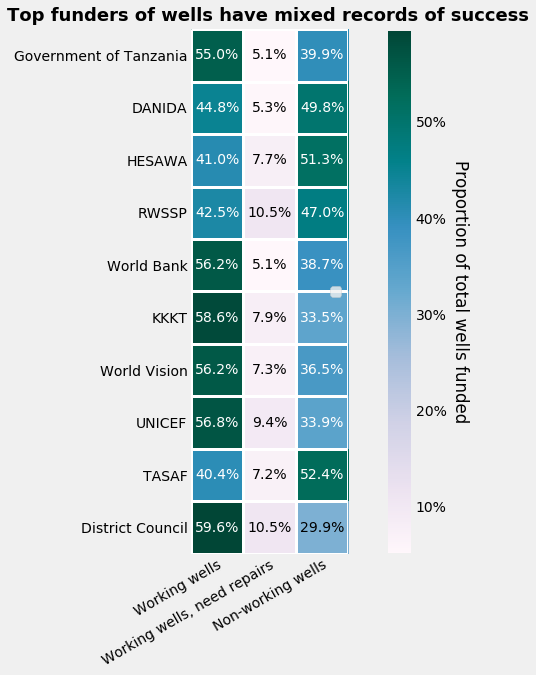

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

f, ax = plt.subplots(figsize=(12,9))

plt.style.use('fivethirtyeight')
clear_col_labels = ['Working wells', 'Working wells, need repairs', 'Non-working wells']
im, cbar = heatmap(top_funders_table,
                   col_labels=clear_col_labels,
                   row_labels = top_funders_labels,
                   ax = ax,
                   cmap = 'PuBuGn',
                   cbarlabel = 'Proportion of total wells funded');

sizes, labels = ax.get_legend_handles_labels()

plt.legend( loc = 'right', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, sizes)])
ax.text(s='Top funders of wells have mixed records of success',
        x=-4,
        y=-0.65,
        weight='bold',
        size=18
)
plt.grid(False)

texts = annotate_heatmap(im, valfmt="{x:.1f}");

ax.tick_params('x', pad=4)

##### Treemap experiments

In [0]:
!pip install squarify

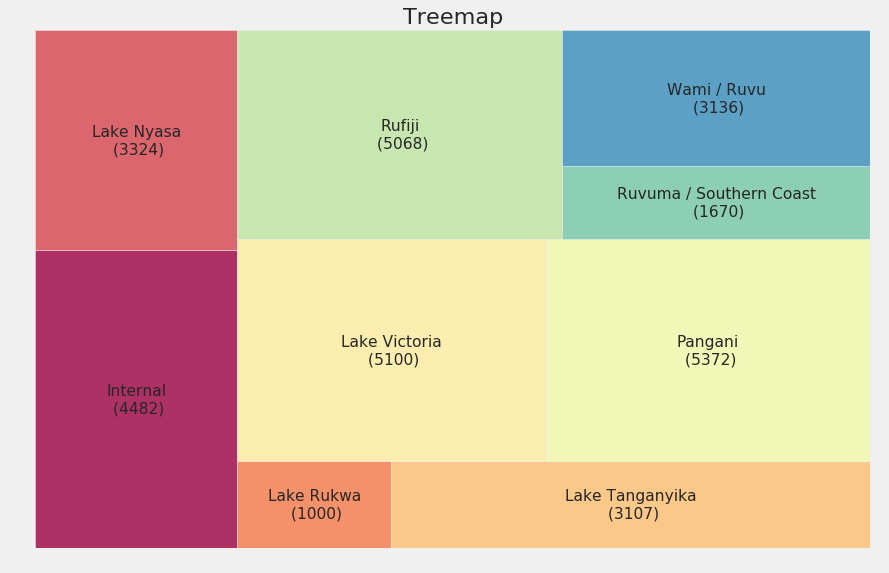

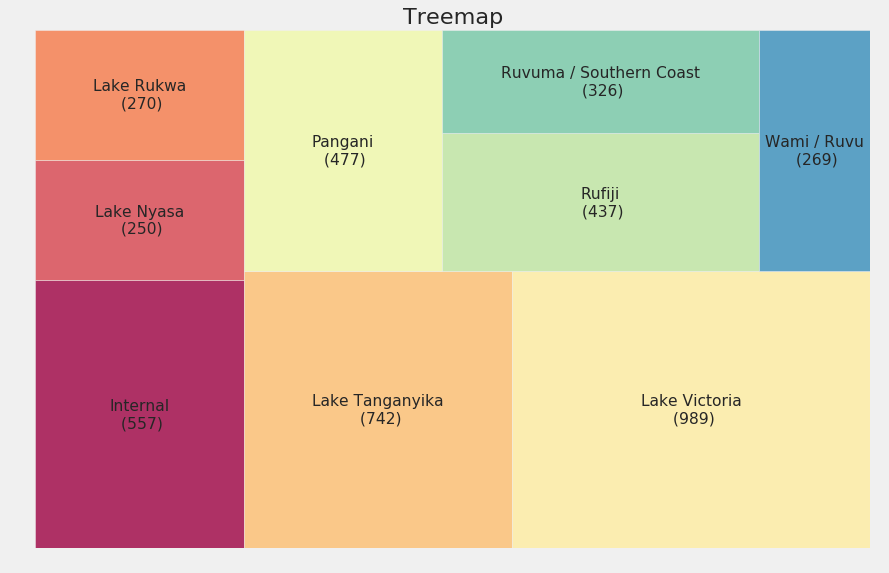

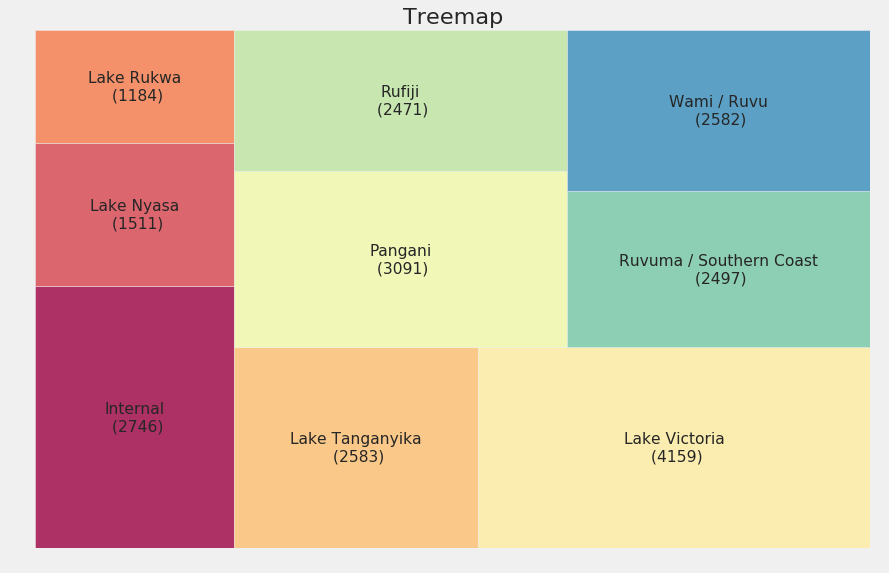

In [0]:
import squarify

train_feat_url = 'https://raw.githubusercontent.com/will-cotton4/A-LSDS-prediction-kaggle/master/train_features.csv'
train_label_url = 'https://raw.githubusercontent.com/will-cotton4/A-LSDS-prediction-kaggle/master/train_labels.csv'
test_feat_url = 'https://raw.githubusercontent.com/will-cotton4/A-LSDS-prediction-kaggle/master/test_features.csv'

X = pd.read_csv(train_feat_url)
train_labels = pd.read_csv(train_label_url)
test_features = pd.read_csv(test_feat_url)

X = X.merge(train_labels, on=X.index)

masks = [X.status_group=='functional', X.status_group=='functional needs repair',
        X.status_group=='non functional']

def tree_pump(mask, X):
  df = X[mask].groupby('basin').size().reset_index(name='counts')

  labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
  sizes = df['counts'].values.tolist()
  colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

  # Draw Plot
  plt.figure(figsize=(12,8), dpi= 80)
  squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

  # Decorate
  plt.title('Treemap')
  plt.axis('off')
  plt.show()
  
label_dict = {'functional': 'Working', 'functional needs repair': 'Working, needs repair', 'non functional': 'Not working'}
X = X.replace(label_dict)
  
for mask in masks:
  tree_pump(mask, X)

In [0]:
df = pd.crosstab(X.status_group, [X.basin, X.region]).T

labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap')
plt.axis('off')
plt.show()

KeyError: ignored

##### Dendrogram experiments:

In [0]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [96]:
import scipy.cluster.hierarchy as shc

masks = [X.status_group=='functional', X.status_group=='functional needs repair',
        X.status_group=='non functional']

mask = X.status_group=='functional'

df = pd.crosstab(X.status_group, [X.basin, X.region]).T

Z = shc.linkage(df, 'single')
plt.figure(figsize=(20,10))
           

# dm = shc.dendrogram(Z, labels = X.region.values, leaf_font_size = 12, 
#                     count_sort = True, show_leaf_counts=True)


fancy_dendrogram(
    Z,
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

AttributeError: ignored

In [0]:
df

status_group,Not working,Working,"Working, needs repair"
basin,,,
Internal,2746,4482,557
Lake Nyasa,1511,3324,250
Lake Rukwa,1184,1000,270
Lake Tanganyika,2583,3107,742
Lake Victoria,4159,5100,989
Pangani,3091,5372,477
Rufiji,2471,5068,437
Ruvuma / Southern Coast,2497,1670,326
Wami / Ruvu,2582,3136,269


##### Map experiments:

In [0]:
!apt-get install libgeos++-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgeos-dev
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos++-dev libgeos-dev
0 upgraded, 2 newly installed, 0 to remove and 7 not upgraded.
Need to get 884 kB of archives.
After this operation, 7,355 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos++-dev amd64 3.6.2-1build2 [811 kB]
Fetched 884 kB in 1s (910 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 130824 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...


In [0]:
!pip install geopandas
!pip install descartes
!pip install ez_setup
!pip install contextily

  Using cached https://files.pythonhosted.org/packages/10/34/2aabf40c1acfb4b2f623e90f1a130eba80fd664a2d91c801558acebe3d3c/contextily-0.99.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/e5/92/fe8838fa8158931906dfc4f16c5c1436b3dd2daf83592645b179581403ad/Cartopy-0.17.0.tar.gz
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
ERROR: Command "/usr/bin/python3 /usr/local/lib/python3.6/dist-packages/pip/_vendor/pep517/_in_process.py get_requires_for_build_wheel /tmp/tmpl57vsme2" failed with error code 1 in /tmp/pip-install-pe_0sokb/cartopy


ModuleNotFoundError: ignored

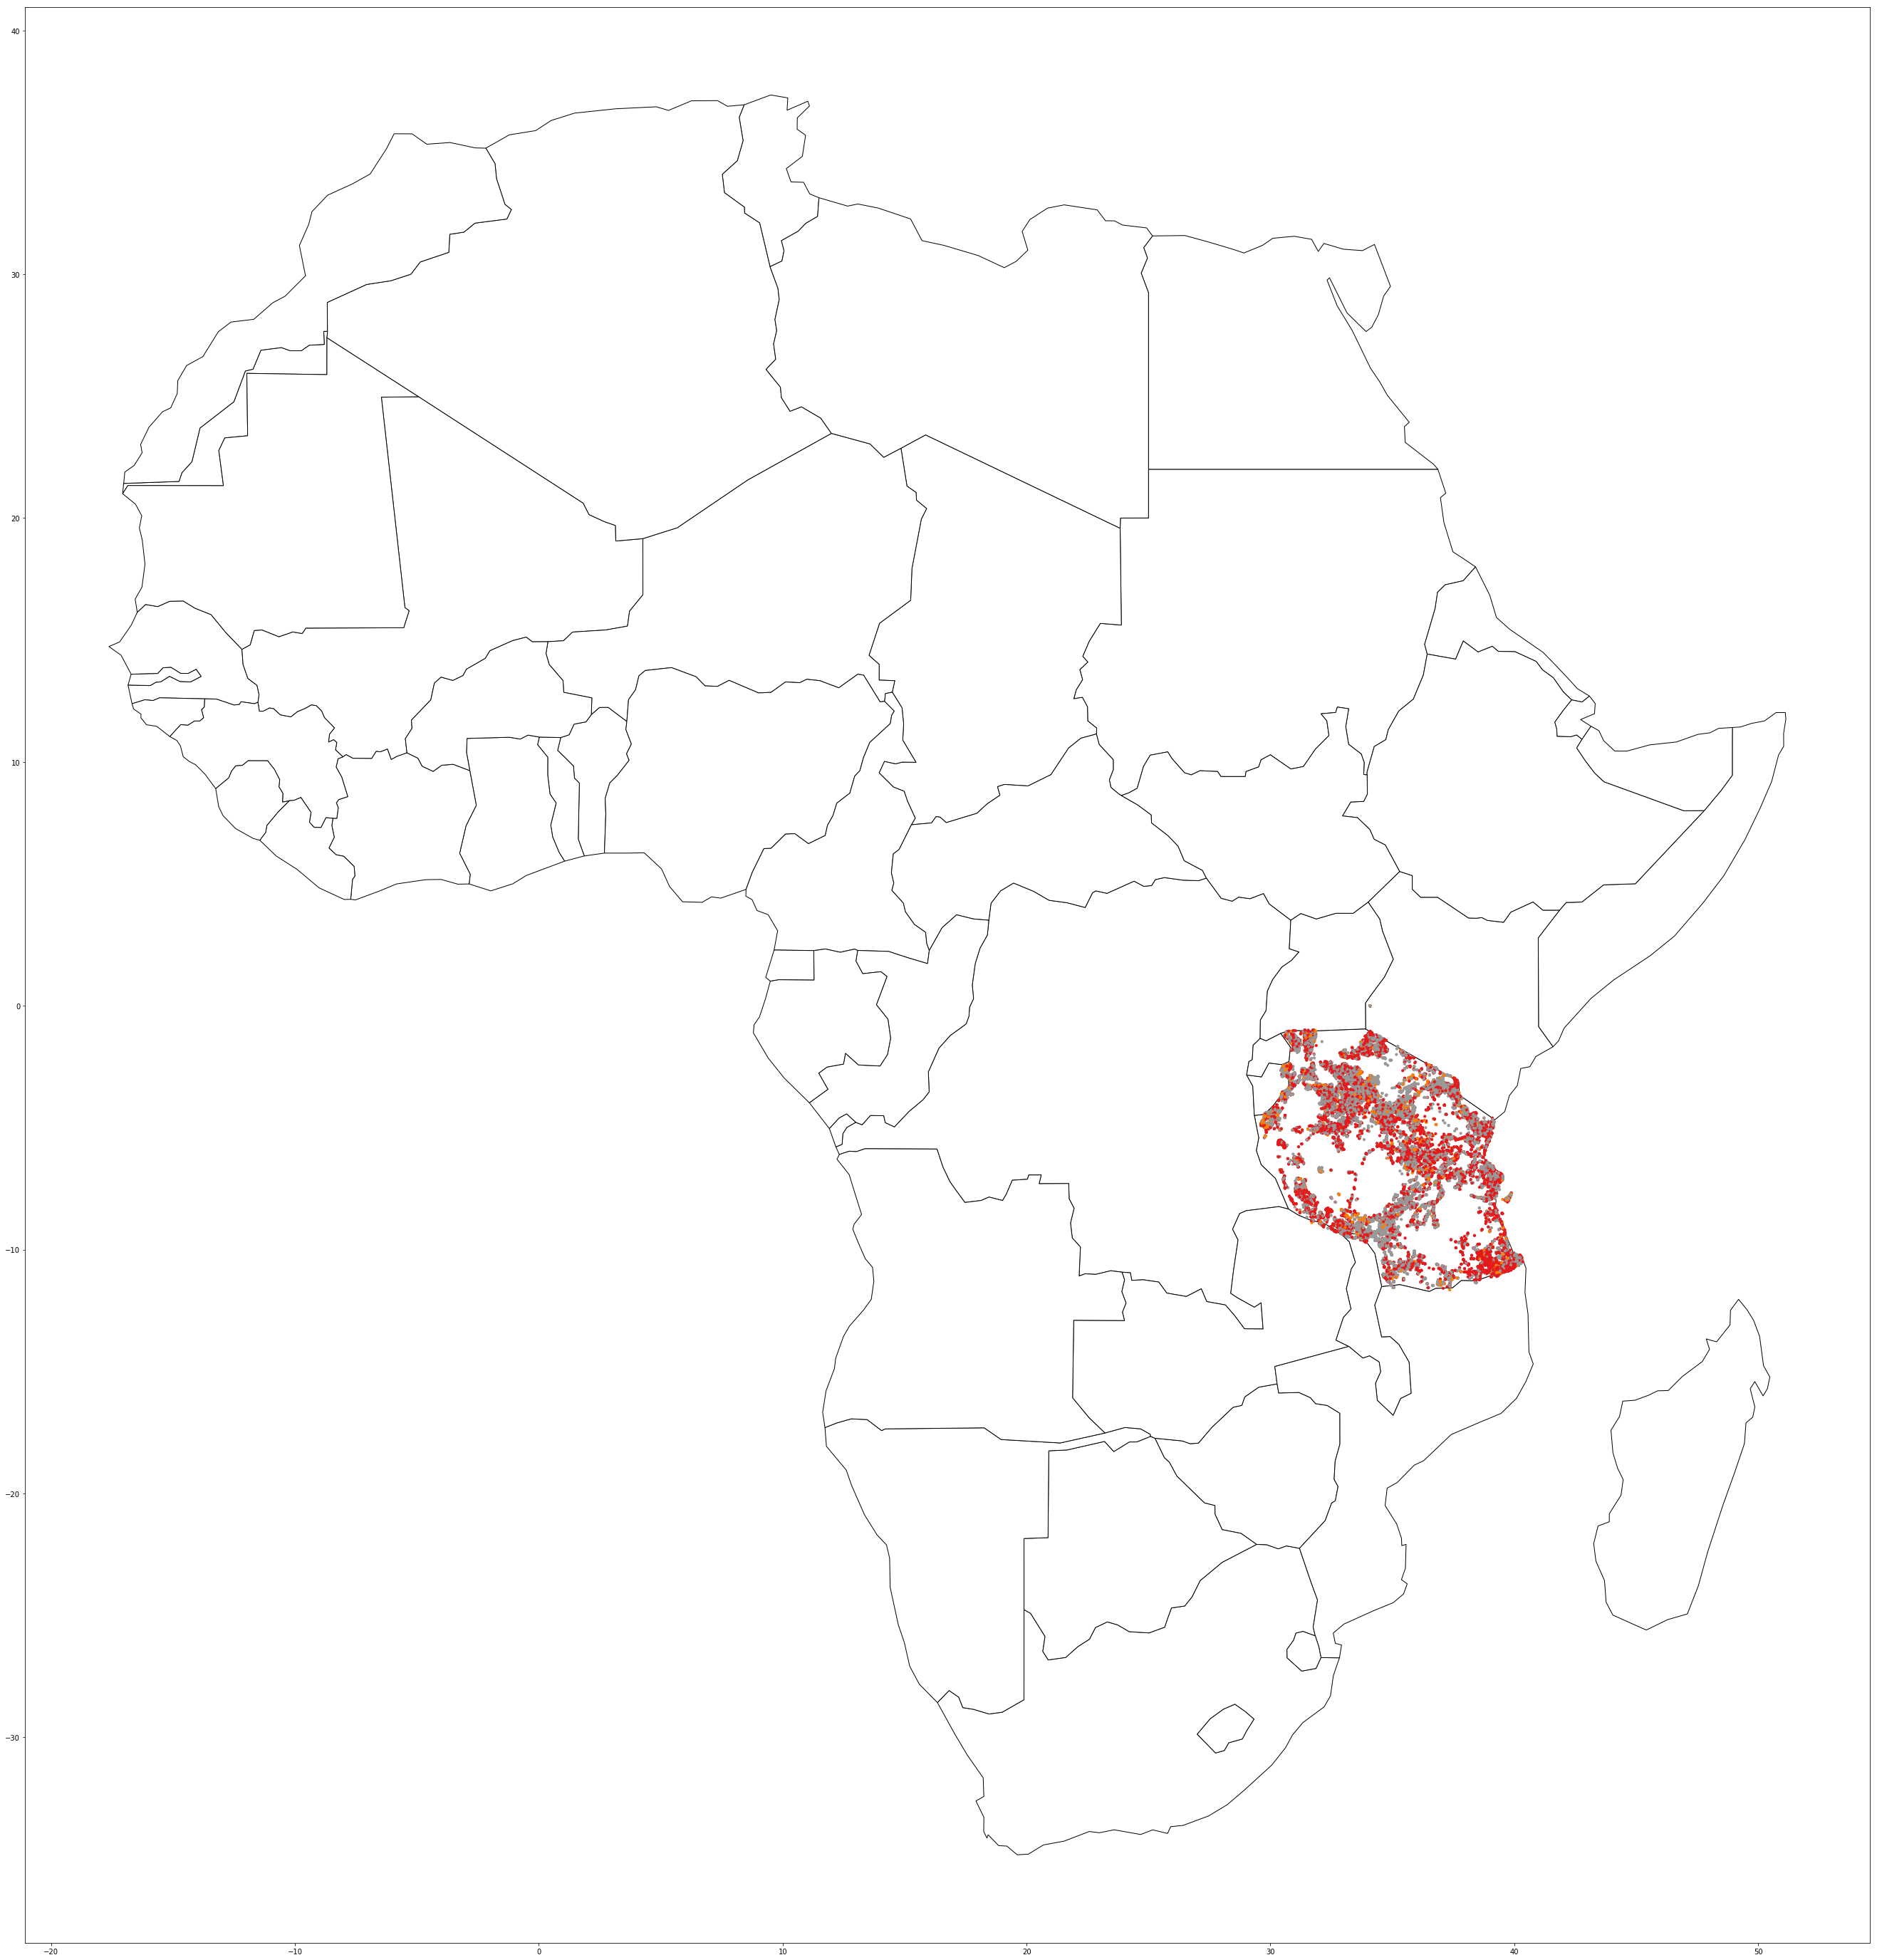

In [0]:
import geopandas
import descartes

from pylab import rcParams
rcParams['figure.figsize'] = 50, 50

features = 'https://raw.githubusercontent.com/mkirby1995/Tanzania_water_project/master/train_features.csv'
target = 'https://raw.githubusercontent.com/mkirby1995/Tanzania_water_project/master/train_labels.csv'

features = pd.read_csv(features)
labels = wrangle_labels(pd.read_csv(target))

features['latitude'] = features['latitude'].replace({0:features['latitude'].mean()})
features['longitude'] = features['longitude'].replace({0:features['longitude'].mean()})

gdf = geopandas.GeoDataFrame(
    features, geometry=geopandas.points_from_xy(features.longitude, features.latitude))

gdf = gdf.merge(labels, on = gdf.index)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world[world.continent == 'Africa'].plot(
    color='white', edgecolor='black')


ax.scatter(gdf['longitude'], gdf['latitude'],
           c=gdf.status_group, alpha=1, s=10, cmap='Set1')


import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))
    
add_basemap(ax, zoom=10, url = 'https://geology.com/world/tanzania-map.gif')

#-12, 0
plt.ylim(-4, 0)
#28, 41
plt.xlim(28,32)

plt.show()

##### Stacked bar plot:

In [0]:
import pandas as pd
import numpy as np
basins = X.basin.values.tolist()
regions = X.region.values.tolist()

N = len(basins)
print(N)
df = pd.crosstab(X.status_group, [X.basin, X.region]).T
ind = np.arange(N)
# subvillages = X.subvillage.values.tolist()
bars_working = list(np.zeros(N))
bars_repair = np.zeros(N)
bars_not_working = np.zeros(N)
i=0
for basin in basins:
  N = len(df.loc[basin]['Working'].values.tolist())  
  ind = np.arange(N)
  
  bars_working[i] = plt.bar(ind, df.loc[basin]['Working'].values.tolist(), width=0.35)
#   bars_repair[i] = plt.bar(ind, df.loc[basin]['Working, needs repair'].values)
#   bars_not_working[i] = plt.bar(ind, df.loc[basin]['Not Working'].values)
  i+=1
  print(i)


59400


KeyError: ignored

Rectangle(xy=(-0.25, 0), width=0.5, height=2746, angle=0)


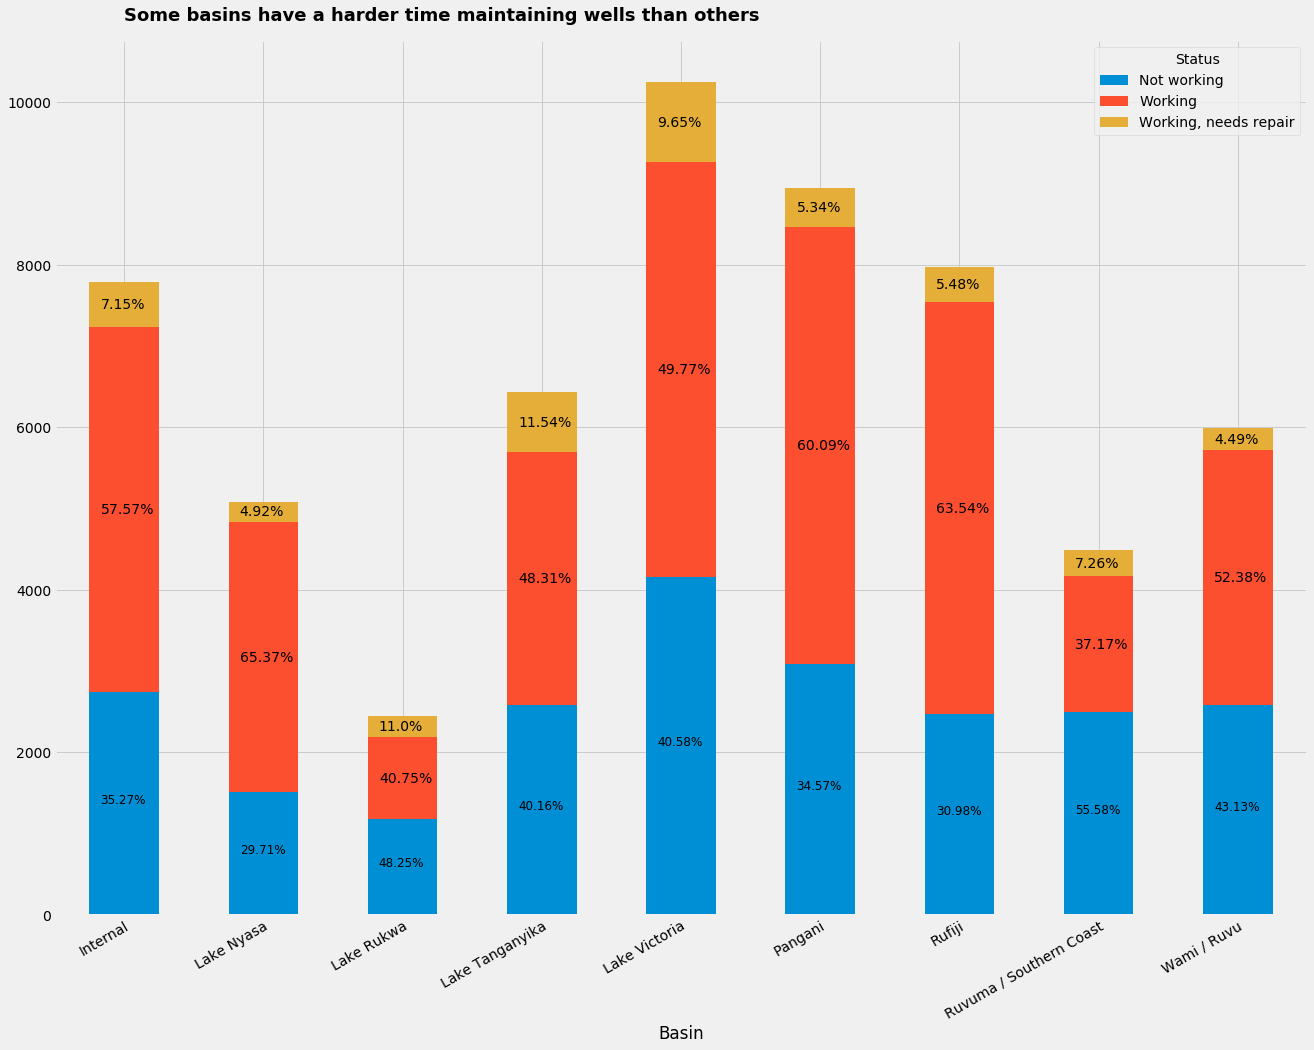

In [92]:
import matplotlib.pyplot as plt

label_dict = {'functional': 'Working', 'functional needs repair': 'Working, needs repair', 'non functional': 'Not working'}
X_fix = X.rename(columns={'status_group':'Status', 'basin':'Basin'}).replace(label_dict)
df = pd.crosstab(X_fix.Status, [X_fix.Basin]).T

fig, ax = plt.subplots(figsize = (20,15))

df.plot.bar(ax=ax,stacked=True)
# Rotate the tick labels and set their alignment.

plt.setp(ax.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")

ax.text(s='Some basins have a harder time maintaining wells than others',
        x=0, y=11000, fontweight='bold', size=18
)

i=0
print(ax.patches[0])
# Adds percentage labels for each functional group and basin
for row in df.iterrows():
  x = ax.patches[i].xy[0] + 0.08
  
  basin = row[0]
  
  total = sum(df.loc[basin])
  
  functional=df.loc[basin][0]
  functional_prop=functional/total
  f_n_r = df.loc[basin][1]
  f_n_r_prop = f_n_r/total
  non_functional = df.loc[basin][2]
  non_functional_prop = non_functional/total
  
  # Add functional well proportion annotation
  
  # Set height to be in middle of bar
  y = np.mean([0, functional])
  ax.text(s=str(round(functional_prop*100,2))+'%', x=x, y=y, size = 12)
  
  #Add needs repair annotation
  # Set height to be in middle of bar
  y = np.mean([functional, functional + f_n_r])-50
  ax.text(s=str(round(f_n_r_prop*100,2))+'%', x=x, y=y)
  
  #Add needs repair annotation
  # Set height to be in middle of bar
  y = np.mean([functional+f_n_r,total])-50
  ax.text(s=str(round(non_functional_prop*100,2))+'%', x=x, y=y)
 
  
  i+=1
  